In [112]:
import numpy as np
import pandas as pd

In [113]:
df = pd.read_csv("Automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [114]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [115]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [116]:
from sklearn.preprocessing import LabelEncoder

In [117]:
lb= LabelEncoder()

In [118]:

for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna("Missing")
    
    
    df[col] = lb.fit_transform(df[col])


#print(df.dtypes)


In [119]:
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,31
1,3,51,0,1,0,2,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,50


In [120]:
x = df.drop(columns = ['price'])
y = df['price']

In [121]:
from sklearn.model_selection import train_test_split 

In [122]:
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2,
                                                    random_state=42)

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [124]:
rf = RandomForestRegressor(
    n_estimators=200, 
    max_features="sqrt", 
    max_depth=20, 
    max_leaf_nodes=20
)

In [125]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [126]:
rf.fit(x_train,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,20
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [127]:
y_pred = rf.predict(x_test) 

In [128]:
from sklearn.metrics import r2_score

In [129]:
r2_score(y_test , y_pred)

0.2810696155804766

In [130]:
model = RandomForestRegressor()
scores = cross_val_score(model, x_scaled, y, cv=5, scoring='r2')

In [131]:
print("Cross-validation R² scores for each fold:", scores)
print("Average R² score:", scores.mean())

Cross-validation R² scores for each fold: [ 0.18380096 -0.17316076  0.52760353  0.08045346  0.28403747]
Average R² score: 0.18054693403637398


In [132]:
df = df.drop(columns = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'engine-type',
    'num-of-cylinders',
    'fuel-system'
])
df.head()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,130,23,4,9.0,5,10,21,27,31
1,88.6,168.8,64.1,48.8,2548,130,23,4,9.0,5,10,21,27,50
2,94.5,171.2,65.5,52.4,2823,152,1,27,9.0,20,10,19,26,50
3,99.8,176.6,66.2,54.3,2337,109,13,24,10.0,2,16,24,30,36
4,99.4,176.6,66.4,54.3,2824,136,13,24,8.0,8,16,18,22,61


In [133]:
x = df.iloc[: , [0,1]].values

In [134]:
from sklearn.cluster import KMeans

In [135]:
import matplotlib.pyplot as plt

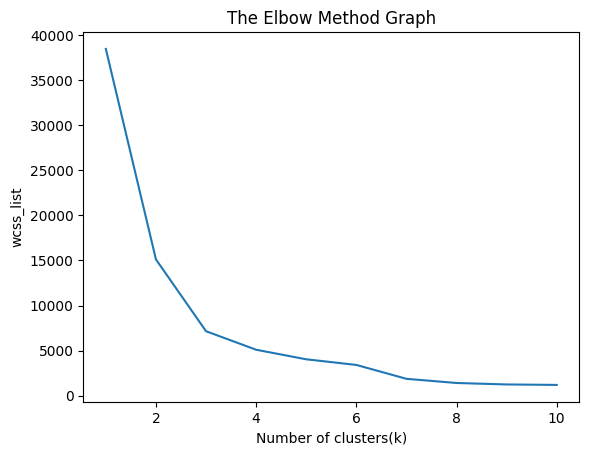

In [136]:
a = []

for i in range(1,11):
    b = KMeans(n_clusters = i , init = 'k-means++' , random_state = 42)
    b.fit(x)
    a.append(b.inertia_)

plt.plot(range(1,11) , a)

plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('wcss_list')
plt.show()

In [137]:
b = KMeans(n_clusters=3, init='k-means++', random_state= 42)
y_predict= b.fit_predict(x)


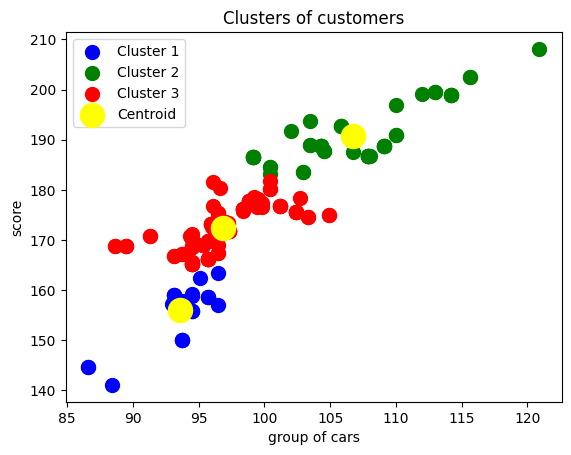

In [138]:

 #visulaizing the clusters
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for cluster 1
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for 2
plt.scatter(x[y_predict == 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for 3


plt.scatter(b.cluster_centers_[:, 0], b.cluster_centers_[:, 1], s = 300, c = 'yellow',
            label = 'Centroid')
plt.title("Clusters of customers")
plt.xlabel('group of cars')
plt.ylabel("score")
plt.legend()
plt.show()
